In [1]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


# Read in MRI scans

In [2]:
import pydicom as dicom
import os
import numpy
from matplotlib import pyplot, cm

In [5]:
# This code is based on the article at
# https://pyscience.wordpress.com/2014/09/08/dicom-in-python-
# importing-medical-image-data-into-numpy-with-pydicom-and-vtk/
def read_one_scan(data_dir, slices):
    refDs = dicom.read_file(data_dir + slices[0])
    
    # Load dimensions based on number of rows, cols, and slices (along Z-axis)
    constPixelDims = (int(refDs.Rows), int(refDs.Columns), len(slices))
    
    #Load Pixel-Spacing values in mm
    constPixelSpacing = (float(refDs.PixelSpacing[0]),
                         float(refDs.PixelSpacing[1]),
                         float(refDs.SliceThickness))
    
    # Setup axes for the array
    x_axis = numpy.arange(0.0, (constPixelDims[0] + 1)*constPixelSpacing[0], constPixelSpacing[0])
    y_axis = numpy.arange(0.0, (constPixelDims[1] + 1)*constPixelSpacing[1], constPixelSpacing[1])
    z_axis = numpy.arange(0.0, (constPixelDims[2] + 1)*constPixelSpacing[2], constPixelSpacing[2])
    
    # Build the 3-D array representing the whole MRI scan
    scan = numpy.zeros(constPixelDims, dtype=refDs.pixel_array.dtype)

    # Now, stack each slice along the Z-axis
    for ind in range(len(slices)):
        # read in the slice
        curr_slice = dicom.read_file(data_dir + slices[ind])
    
        # Store the slice in the 3D array
        scan[:, :, ind] = curr_slice.pixel_array
    
    return scan

# Read in tumor Masks and scale them down to 256x256

In [7]:
def read_mask_for_one_slice(slice_loc):
    zoomed_mask = numpy.zeros(shape=(512, 512), dtype=int)
    with open(mask_f, "r") as f:
        line_1 = f.readline()
        line_2 = f.readline()
        for line in f:
            x, y = line.rstrip().split(";")
            
            zoomed_mask[int(x)][int(y)] = 1
    
    #
    # The relationship between original pixels and zoomed in pixels is as follows
    # Let (x, y) be a pixel in original mask
    #
    # AFTER ZOOMING IN 2 TIME
    #
    # This one pixel should correspond to 4 pixels
    # (2x,   2y), (2x,   2y+1)
    # (2x+1, 2y), (2x+1, 2y+1)
    #
    # Ex: Pixel (1, 1) is scaled up
    #     to 4 pixels: (2, 2), (2, 3)
    #                  (3, 2), (3, 3)
    #                         
    original_mask = numpy.zeros((256, 256), dtype=int)
    
    # Let's fill each of the original pixels based on the
    # correspinding 4 pixels in the zoomed in mask
    for row in range(256):
        for col in range(256):
            val =   zoomed_mask[2*row  ][2*col    ] \
                  + zoomed_mask[2*row  ][2*col + 1] \
                  + zoomed_mask[2*row+1][2*col    ] \
                  + zoomed_mask[2*row+1][2*col + 1]
        
            original_mask[row][col] = (val != 0)
    
    return original_mask

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
def make_image(mri_slice, seg):
#     _img = mri_scan[:, coronal_index, :].T[::-1, :]

#     _seg = to_single_class(true_seg, threshold=0.5)[:, coronal_index, :].T[::-1, :]
#     _pred_seg = to_single_class(pred_seg, threshold=0.5)[:, coronal_index, :].T[::-1, :]
    
    _img = mri_slice
    _seg = seg

    vmax = 1
    vmin = 0
    cmap = plt.cm.RdYlBu

    colors = Normalize(vmin, vmax, clip=True)(_seg)
    colors = cmap(colors)
    colors[..., -1] = _seg

    fig, axarr = plt.subplots(1, 1)
    axarr.set_title("Subject: %s" % "patient")
    axarr.imshow(_img, cmap='gray')
    axarr.imshow(colors)
    axarr.set_axis_off()

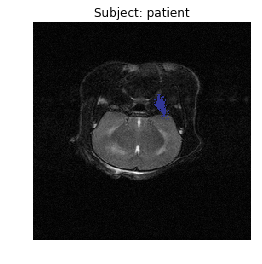

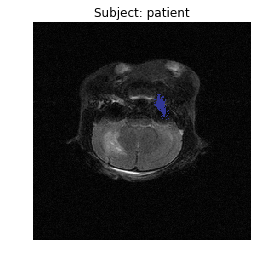

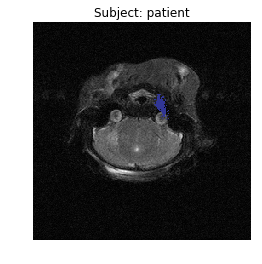

In [19]:
DATA_DIR = "/home/jovyan/work/Images/1328/DICOM/18449/"
slices   = ["18449_00001.dcm",
            "18449_00002.dcm",
            "18449_00003.dcm",
            "18449_00004.dcm",
            "18449_00005.dcm",
            "18449_00006.dcm",
            "18449_00007.dcm",
            "18449_00008.dcm"]

scan = read_one_scan(DATA_DIR, slices)

MASK_DIR = "/home/jovyan/work/CS230 Segmentation Preclinical data - Part 1/ROIs/"
mask_fs  = ["1328-18449-sl5.roi",
            "1328-18449-sl6.roi",
            "1328-18449-sl7.roi"]

mask_5   = read_mask_for_one_slice(MASK_DIR + mask_fs[0])
mask_6   = read_mask_for_one_slice(MASK_DIR + mask_fs[1])
mask_7   = read_mask_for_one_slice(MASK_DIR + mask_fs[2])

make_image(scan[:, :, 4], mask_5)
make_image(scan[:, :, 5], mask_6)
make_image(scan[:, :, 6], mask_7)

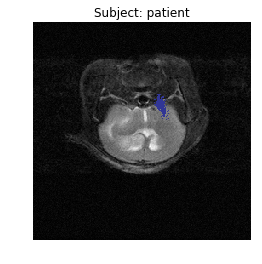

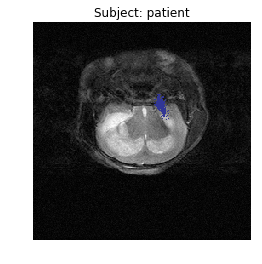

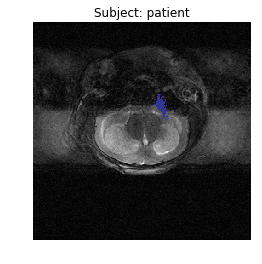

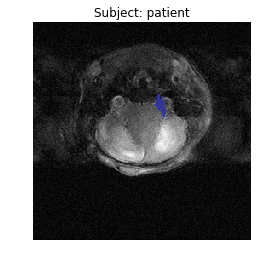

In [21]:
DATA_DIR = "/home/jovyan/work/CS230 Segmentation Preclinical data - Part 1/Images/1324/DICOM/18381/"
slices   = ["18381_00001.dcm",
            "18381_00002.dcm",
            "18381_00003.dcm",
            "18381_00004.dcm",
            "18381_00005.dcm",
            "18381_00006.dcm",
            "18381_00007.dcm",
            "18381_00008.dcm"]

scan = read_one_scan(DATA_DIR, slices)

MASK_DIR = "/home/jovyan/work/CS230 Segmentation Preclinical data - Part 1/ROIs/"
mask_fs  = ["1328-18381-sl4.roi",
            "1324-18381-sl5.roi",
            "1328-18381-sl6.roi",
            "1328-18381-sl7.roi"]

mask_4   = read_mask_for_one_slice(MASK_DIR + mask_fs[0])
mask_5   = read_mask_for_one_slice(MASK_DIR + mask_fs[1])
mask_6   = read_mask_for_one_slice(MASK_DIR + mask_fs[2])
mask_7   = read_mask_for_one_slice(MASK_DIR + mask_fs[3])

make_image(scan[:, :, 3], mask_4)
make_image(scan[:, :, 4], mask_5)
make_image(scan[:, :, 5], mask_6)
make_image(scan[:, :, 6], mask_7)